In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

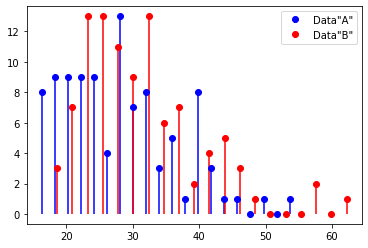

In [2]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [3]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))

In [4]:
nPerms = np.arange(100, 5001, 100)
zVal = np.zeros(nPerms.shape[0])
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])

In [ ]:
for i in range(nPerms.shape[0]):
    permdiffs = np.zeros(nPerms[i])

    for permi in range(nPerms[i]):
        fconds = np.random.permutation(N*2)
        fconds[fconds<N] = 1
        fconds[fconds>1] = 2
        permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])

    zVal[i] = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
    print(i)


In [6]:
zValMean = np.mean(zVal)
p = 1-stats.norm.cdf(abs(zValMean))

print(f'Mean Z-Value : {zValMean}, p-value : {p}')

Mean Z-Value : 2.7726247747505677, p-value : 0.0027803098563401463


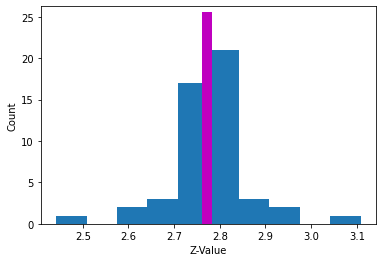

In [7]:
plt.hist(zVal)
plt.plot([zValMean, zValMean], [0, 25],'m',linewidth=10)
plt.xlabel('Z-Value')
plt.ylabel('Count')
plt.show()

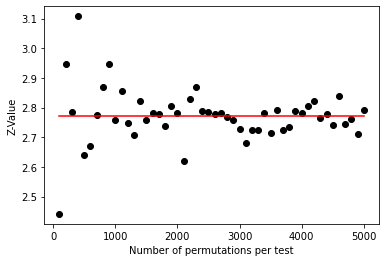

In [8]:
plt.plot(nPerms, zVal, 'ko')
plt.plot([np.min(nPerms), np.max(nPerms)], [zValMean, zValMean], 'r')
plt.xlabel('Number of permutations per test')
plt.ylabel('Z-Value')
plt.show()